In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [60]:
# read data from csv, utf-8 encoding
df = pd.read_csv('../data/data_v2.csv', encoding='utf-8')

In [61]:
df.head(10)

,Unnamed: 0,amount,amount.1,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported
0,0,476.86,425.20,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False
1,1,700.00,714.80,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False
2,2,30.00,31.14,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False
3,3,550.00,629.66,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False
4,4,2285.25,2052.09,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False
5,5,50.12,50.12,2023-09-14,3265e49310ccd3e53fc2,Laurie Lewis,Laurie Lewis,True,True
6,6,110000.00,111559.84,2023-09-14,138201efb13d33dc066e,Gregory Morris,Gregory Morris,True,False
7,7,260652.40,294826.94,2023-09-14,7178f6a33ebd18b999fb,Gene Alexander,Gene Alexander,True,False
8,8,400.00,323.72,2023-09-14,06b1d74a6fbdb1093751,Austin Estrada,Austin Estrada,False,False
9,9,175.00,171.99,2023-09-14,741fb6f26edd5f1f0692,Tony Yu,Tony Yu,False,False


In [63]:
data = df[['amount.1', 'createdAt', 'recipient_accountNumber', 'recipient_full_name', 'sender_full_name', 'reported']].copy()

In [64]:
df['reported'].value_counts()

False    74047
True      1396
Name: reported, dtype: int64

In [65]:
df.shape

(75443, 9)

In [66]:
data.isna().sum()

amount.1                   0
createdAt                  0
recipient_accountNumber    0
recipient_full_name        0
sender_full_name           0
reported                   0
dtype: int64

In [67]:
df[['tx_amount', 'createdAt', 'recipient_accountNumber', 'recipient_full_name', 'sender_full_name', 'reported']].head(15)

KeyError: "['tx_amount'] not in index"

In [38]:
df['createdAt']

0         2023-06-15
1         2023-06-15
2         2023-06-15
3         2023-06-15
4         2023-06-15
             ...    
144491    2023-11-25
144492    2023-11-25
144493    2023-11-25
144494    2023-11-25
144495    2023-11-25
Name: createdAt, Length: 144496, dtype: object

In [68]:
# df.rename(columns={'recipient_accountNumber	': 'recipient_accNumber', 'recipient_full_name': 'recipient_name', 
#                    'sender_full_name': 'sender', 'tx_amount': 'amount'}, inplace=True)
df.rename(columns={'tx_amount': 'amount.1'}, inplace=True)

In [40]:
# df.drop(['Unnamed: 0', 'amount.1'], axis=1, inplace=True)
# df.rename(columns={'recipient.fake_accountNumber': 'recipient_accNumber', 'recipient.fake_name': 'recipient_name', 
#                    'sender.fake_name': 'sender', 'fake_amount': 'amount'}, inplace=True)

In [69]:
print(df['reported'].value_counts())
print(df['reported'].value_counts(normalize=True))

False    74047
True      1396
Name: reported, dtype: int64
False    0.981496
True     0.018504
Name: reported, dtype: float64


In [70]:
df.head()

,Unnamed: 0,amount,amount.1,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported
0,0,476.86,425.20,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False
1,1,700.00,714.80,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False
2,2,30.00,31.14,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False
3,3,550.00,629.66,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False
4,4,2285.25,2052.09,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False


## Feature Engineering

In [71]:
df['day'] = pd.to_datetime(df['createdAt']).dt.day
df['month'] = pd.to_datetime(df['createdAt']).dt.month
df['year'] = pd.to_datetime(df['createdAt']).dt.year
df['weekofyear'] = pd.to_datetime(df['createdAt']).dt.isocalendar().week
df['is_weekend'] = pd.to_datetime(df['createdAt']).dt.dayofweek.apply(lambda x: 1 if x > 4 else 0)
df['day_of_week'] = pd.to_datetime(df['createdAt']).dt.dayofweek
df['quarter'] = pd.to_datetime(df['createdAt']).dt.quarter

In [72]:
df['daily_tx_count_of_recipient'] = df.groupby(['recipient_full_name', 'day', 'month'])['amount'].transform('count')
df['daily_tx_count_of_sender'] = df.groupby(['sender_full_name', 'day', 'month'])['amount'].transform('count')
df['daily_tx_count_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'day', 'month'])['amount'].transform('count')

df['weekly_tx_count_of_recipient'] = df.groupby(['recipient_full_name', 'weekofyear'])['amount'].transform('count')
df['weekly_tx_count_of_sender'] = df.groupby(['sender_full_name', 'weekofyear'])['amount'].transform('count')
df['weekly_tx_count_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'weekofyear'])['amount'].transform('count')

df['monthly_tx_count_of_recipient'] = df.groupby(['recipient_full_name', 'month'])['amount'].transform('count')
df['monthly_tx_count_of_sender'] = df.groupby(['sender_full_name', 'month'])['amount'].transform('count')
df['monthly_tx_count_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'month'])['amount'].transform('count')

In [73]:
import numpy as np

df['log_amount'] = df['amount'].apply(lambda x: np.log(x))
df['scaled_amount'] = MinMaxScaler().fit_transform(df['amount'].values.reshape(-1, 1))

In [74]:
# recipient accounts per recipient name
df['recipient_acc_per_recipient_name'] = df.groupby(['recipient_full_name'])['recipient_accountNumber'].transform('nunique')
# senders per recipient name
df['sender_per_recipient_name'] = df.groupby(['recipient_full_name'])['sender_full_name'].transform('nunique')

In [75]:
# weekly tx amount of recipient
df['weekly_tx_amount_of_recipient'] = df.groupby(['recipient_full_name', 'weekofyear'])['amount'].transform('sum')
# weekly tx amount of sender
df['weekly_tx_amount_of_sender'] = df.groupby(['sender_full_name', 'weekofyear'])['amount'].transform('sum')
# weekly tx amount of recipient account number
df['weekly_tx_amount_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'weekofyear'])['amount'].transform('sum')


# monthly tx amount of recipient
df['monthly_tx_amount_of_recipient'] = df.groupby(['recipient_full_name', 'month'])['amount'].transform('sum')
# monthly tx amount of sender
df['monthly_tx_amount_of_sender'] = df.groupby(['sender_full_name', 'month'])['amount'].transform('sum')
# monthly tx amount of recipient account number
df['monthly_tx_amount_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'month'])['amount'].transform('sum')

# daily tx amount of recipient
df['daily_tx_amount_of_recipient'] = df.groupby(['recipient_full_name', 'day'])['amount'].transform('sum')
# daily tx amount of sender
df['daily_tx_amount_of_sender'] = df.groupby(['sender_full_name', 'day'])['amount'].transform('sum')
# daily tx amount of recipient account number
df['daily_tx_amount_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'day'])['amount'].transform('sum')

In [48]:
# weekly average tx amount of recipient
df['weekly_average_tx_amount_of_recipient'] = df.groupby(['recipient_full_name', 'weekofyear'])['amount'].transform('mean')
# weekly average tx amount of sender
df['weekly_average_tx_amount_of_sender'] = df.groupby(['sender_full_name', 'weekofyear'])['amount'].transform('mean')
# weekly average tx amount of recipient account number
df['weekly_average_tx_amount_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'weekofyear'])['amount'].transform('mean')

# monthly average tx amount of recipient
df['monthly_average_tx_amount_of_recipient'] = df.groupby(['recipient_full_name', 'month'])['amount'].transform('mean')
# monthly average tx amount of sender
df['monthly_average_tx_amount_of_sender'] = df.groupby(['sender_full_name', 'month'])['amount'].transform('mean')
# monthly average tx amount of recipient account number
df['monthly_average_tx_amount_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'month'])['amount'].transform('mean')

# daily average tx amount of recipient
df['daily_average_tx_amount_of_recipient'] = df.groupby(['recipient_full_name', 'day'])['amount'].transform('mean')
# daily average tx amount of sender
df['daily_average_tx_amount_of_sender'] = df.groupby(['sender_full_name', 'day'])['amount'].transform('mean')
# daily average tx amount of recipient account number
df['daily_average_tx_amount_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'day'])['amount'].transform('mean')

In [76]:
# weekly average tx count of recipient
df['weekly_average_tx_count_of_recipient'] = df.groupby(['recipient_full_name', 'weekofyear'])['amount'].transform('count')
# weekly average tx count of sender
df['weekly_average_tx_count_of_sender'] = df.groupby(['sender_full_name', 'weekofyear'])['amount'].transform('count')
# weekly average tx count of recipient account number
df['weekly_average_tx_count_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'weekofyear'])['amount'].transform('count')

# monthly average tx count of recipient
df['monthly_average_tx_count_of_recipient'] = df.groupby(['recipient_full_name', 'month'])['amount'].transform('count')
# monthly average tx count of sender
df['monthly_average_tx_count_of_sender'] = df.groupby(['sender_full_name', 'month'])['amount'].transform('count')
# monthly average tx count of recipient account number
df['monthly_average_tx_count_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'month'])['amount'].transform('count')

# daily average tx count of recipient
df['daily_average_tx_count_of_recipient'] = df.groupby(['recipient_full_name', 'day'])['amount'].transform('count')
# daily average tx count of sender
df['daily_average_tx_count_of_sender'] = df.groupby(['sender_full_name', 'day'])['amount'].transform('count')
# daily average tx count of recipient account number
df['daily_average_tx_count_of_recipient_accNumber'] = df.groupby(['recipient_accountNumber', 'day'])['amount'].transform('count')

In [50]:
print(df.columns)

Index(['amount', 'createdAt', 'recipient_accountNumber', 'recipient_full_name',
       'sender_full_name', 'reviewed', 'reported', 'day', 'month', 'year',
       'weekofyear', 'is_weekend', 'day_of_week', 'quarter',
       'daily_tx_count_of_recipient', 'daily_tx_count_of_sender',
       'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient',
       'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber',
       'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender',
       'monthly_tx_count_of_recipient_accNumber', 'log_amount',
       'scaled_amount', 'recipient_acc_per_recipient_name',
       'sender_per_recipient_name', 'weekly_tx_amount_of_recipient',
       'weekly_tx_amount_of_sender', 'weekly_tx_amount_of_recipient_accNumber',
       'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender',
       'monthly_tx_amount_of_recipient_accNumber',
       'daily_tx_amount_of_recipient', 'daily_tx_amount_of_sender',
       'daily_tx_amount_of

In [29]:
df.to_csv('../data/custom_preprocess_v21.csv', encoding='utf-8', index=False)

In [14]:
# scale amount related features
df['scaled_daily_tx_amount_of_recipient'] = MinMaxScaler().fit_transform(df['daily_tx_amount_of_recipient'].values.reshape(-1, 1))
df['scaled_daily_tx_amount_of_sender'] = MinMaxScaler().fit_transform(df['daily_tx_amount_of_sender'].values.reshape(-1, 1))
df['scaled_daily_tx_amount_of_recipient_accNumber'] = MinMaxScaler().fit_transform(df['daily_tx_amount_of_recipient_accNumber'].values.reshape(-1, 1))

df['scaled_weekly_tx_amount_of_recipient'] = MinMaxScaler().fit_transform(df['weekly_tx_amount_of_recipient'].values.reshape(-1, 1))
df['scaled_weekly_tx_amount_of_sender'] = MinMaxScaler().fit_transform(df['weekly_tx_amount_of_sender'].values.reshape(-1, 1))
df['scaled_weekly_tx_amount_of_recipient_accNumber'] = MinMaxScaler().fit_transform(df['weekly_tx_amount_of_recipient_accNumber'].values.reshape(-1, 1))

df['scaled_monthly_tx_amount_of_recipient'] = MinMaxScaler().fit_transform(df['monthly_tx_amount_of_recipient'].values.reshape(-1, 1))
df['scaled_monthly_tx_amount_of_sender'] = MinMaxScaler().fit_transform(df['monthly_tx_amount_of_sender'].values.reshape(-1, 1))
df['scaled_monthly_tx_amount_of_recipient_accNumber'] = MinMaxScaler().fit_transform(df['monthly_tx_amount_of_recipient_accNumber'].values.reshape(-1, 1))

df['scaled_weekly_average_tx_amount_of_recipient'] = MinMaxScaler().fit_transform(df['weekly_average_tx_amount_of_recipient'].values.reshape(-1, 1))
df['scaled_weekly_average_tx_amount_of_sender'] = MinMaxScaler().fit_transform(df['weekly_average_tx_amount_of_sender'].values.reshape(-1, 1))
df['scaled_weekly_average_tx_amount_of_recipient_accNumber'] = MinMaxScaler().fit_transform(df['weekly_average_tx_amount_of_recipient_accNumber'].values.reshape(-1, 1))


In [15]:
df.to_csv('../data/custom_preprocess_v2.csv', encoding='utf-8', index=False)

## Graphs

<Axes: xlabel='reported', ylabel='count'>

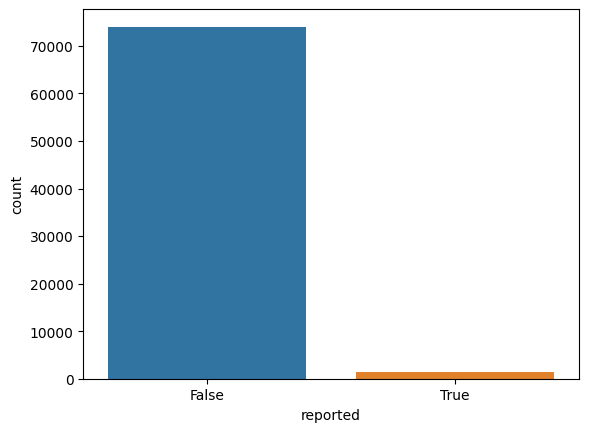

In [22]:
# bar plot distribution of reported transactions 
import seaborn as sns

sns.countplot(x='reported', data=df)

<Axes: xlabel='weekofyear', ylabel='count'>

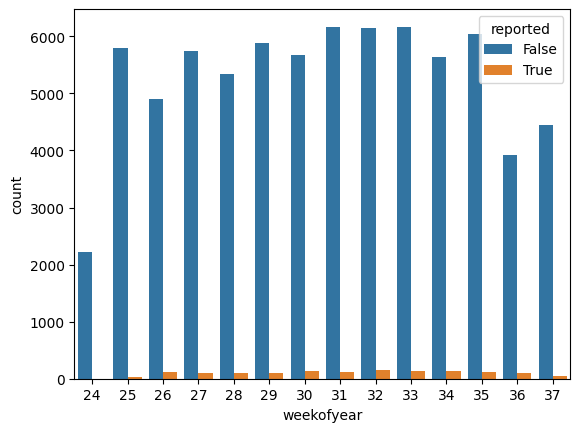

In [27]:
# bar plot distribution of reported transactions over week of year, stacked
import seaborn as sns

sns.countplot(x='weekofyear', hue='reported', data=df)

<Axes: xlabel='weekofyear'>

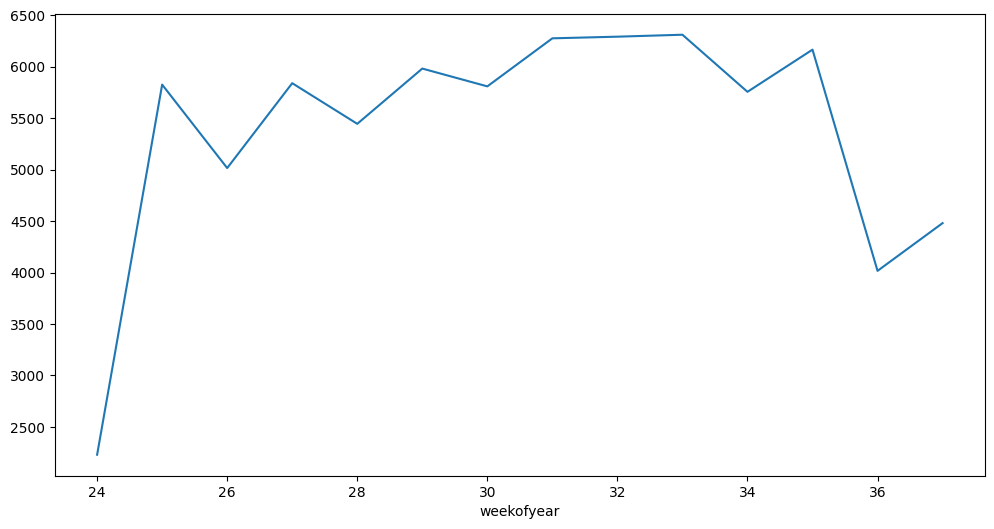

In [31]:
# count line plot distribution of reported transactions over week of year
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['reported'].groupby(df['weekofyear']).count().plot(kind='line')